# Práctica Breast Cancer 

## Descripción

Flujo de Machine Learning con los siguientes pasos:

- Estandarización de datos

- PCA o Feature Selection

- Algoritmo de clasificación Random Forest

- Hiperparametrización con GridSearch

# Description

Applying an ML workflow in a breast cancer prognosis prediction classification problem. The Breast Cancer dataset from sklearn was used.

## Objetives 

- Detect and process outlier values
- Apply scale data techniques
- Apply Principal Component Analysis
- Apply KBest feature section technique
- Apply Random Forest model
- Use sklearn pipeline
- Apply GridSearch auto hyperparameter tuning technique
- Evaluate all approaches independently
- Compare results

### Cargamos los datos

In [34]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

### Importamos las librerias necesarias

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.metrics import *


### Inspeccionamos la descripción de los datos

In [36]:
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

Características fundamentales:

- 569 instancias
- 30 atributos
- No existen valores nulos
- Distribución de clases con 212 Malignant, 357 Bening

La inexistencia de valores nulos nos facilita el preprocesamiento ya que en caso contrario deberíamos de utilizar algún método de imputación de variables o eliminación de instancias.

### Obtenemos las claves del dataset.

Las claves del dataset nos permiten obtener el contenido dentro de este de una forma categorizada.

In [37]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### Como los nombres de las clases

In [38]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

#### O los nombres de los atributos

In [39]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Cargamos los datos en un dataframe

In [40]:
df_features = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Añadimos la columna de clase al dataframe

In [41]:
df_class = pd.DataFrame(breast_cancer.target)

Como vemos todos nuestras variables son numéricas. Esto nos evita el tener que realizar una codificación de variables categóricas.

### Detección de outliers

Los outliers son valores anómalos o extremos dentro de un conjunto de datos.

##### Optamos por la siguiente representación gráfica para su detección.

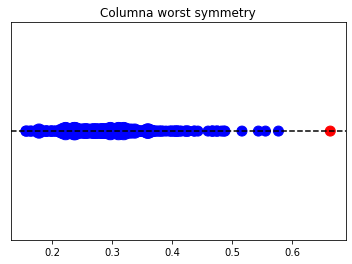

In [42]:
ws = np.array(df_features['worst symmetry'])
edad_unique, counts = np.unique(ws, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("Columna worst symmetry")
plt.show()

Vemos como están distribuidos los datos y como existe un valor que se sale de una forma 'relativamente significativa' de dicha distribución.

Comprobamos algunas columnas más.

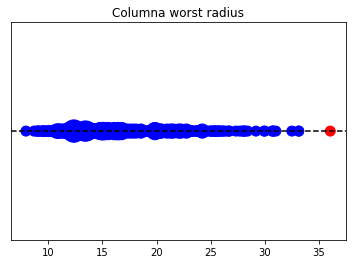

In [43]:
wr = np.array(df_features['worst radius'])
edad_unique, counts = np.unique(wr, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("Columna worst radius")
plt.show()

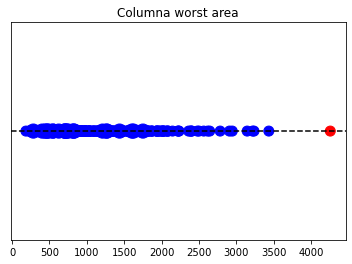

In [44]:
wa = np.array(df_features['worst area'])
edad_unique, counts = np.unique(wa, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.title("Columna worst area")
plt.show()

### Eliminación de outliers

Una vez que tenemos identificado que existen algunos valores que se salen de la distribución normal de los datos podemos proceder a eliminar las instancias correspondientes. 

Añadimos que para determinar si dichas instancias corresponden realmente a valores anómalos o si estos entran dentro de la normalidad del ambito en el cual se han obtenido estos, se debe de tener conocimiento del área en cuestión. 

En nuestro caso procedemos a crear un conjunto con las instancias que contengan valores más extremos de la variable worst area eliminadas.



In [45]:
df_features_outWorstArea = df_features.drop(df_features[df_features['worst area']  > 3500.0].index)

In [46]:
print(df_features[df_features['worst area']  > 3500.0].index)

Int64Index([461], dtype='int64')


Se ha eliminado la instancia 461. Como es de suponer esto no influirá en los resultos. El objetivo es demostrar el proceso de detección y eliminación de outliers.

### División del dataset en conjunto de entrenamiento y test

In [47]:
from sklearn.model_selection import train_test_split 

In [48]:
train_X, test_X, train_y, test_y = train_test_split(df_features, df_class, test_size = 0.3)

## Pipelines

Creamos dos pipelines. En ellos determinamos las operaciones a realizar. En nuestro caso realizaremos en primer lugar la estandarización de los datos, procederemos con la reducción de variables y finalizará con el entrenamiento del modelo. 

In [49]:
pipe_pca = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA()),('classifier', RandomForestClassifier())])
pipe_fs = Pipeline([('scaler', StandardScaler()), ('reduce_dim', SelectKBest()), ('classifier', RandomForestClassifier())])

Obtenemos las claves de los parámetros de los elementos involucrados en los distintos pasos del pipeline. Realizaremos una selección de estos y le asociaremos una secuencia de valores. Finalmente se los pasaremos al método de hiperparametrización automática GridSearch.

In [50]:
pipe_pca.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'reduce_dim', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'reduce_dim__copy', 'reduce_dim__iterated_power', 'reduce_dim__n_components', 'reduce_dim__random_state', 'reduce_dim__svd_solver', 'reduce_dim__tol', 'reduce_dim__whiten', 'classifier__bootstrap', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__max_samples', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_score', 'classifier__random_state', 'classifier__verbose', 'classifier__warm_start'])

In [51]:
pipe_fs.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'reduce_dim', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'reduce_dim__k', 'reduce_dim__score_func', 'classifier__bootstrap', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__max_samples', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_score', 'classifier__random_state', 'classifier__verbose', 'classifier__warm_start'])

In [56]:
parameters_pca = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__n_components': [2, 4, 6], 'classifier__n_estimators':[10, 20, 50], 'classifier__min_samples_leaf':[2, 3, 4]  }
parameters_fs = {'scaler': [StandardScaler(), MinMaxScaler()],
              'reduce_dim__k': [2, 3, 6], 'classifier__n_estimators':[10,20,50], 'classifier__min_samples_leaf':[2, 3, 4, 5]}

In [57]:
grid_pca = GridSearchCV(pipe_pca, param_grid = parameters_pca, scoring = 'roc_auc' )
grid_fs = GridSearchCV(pipe_fs, param_grid = parameters_fs, scoring = 'roc_auc' )

In [58]:
grid_pca.fit(train_X,train_y)
grid_fs.fit(train_X,train_y)
y_pred_grid_pca = grid_pca.predict(test_X)
y_pred_grid_fs = grid_fs.predict(test_X)

In [61]:
auc_grid_pca = cross_val_score(grid_pca,train_X, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
acc_grid_pca = cross_val_score(grid_pca,train_X, train_y, scoring='accuracy', cv=10, n_jobs=-1)

In [62]:
auc_grid_fs = cross_val_score(grid_fs,train_X, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
acc_grid_fs = cross_val_score(grid_fs,train_X, train_y, scoring='accuracy', cv=10, n_jobs=-1)

## Resultados:

In [68]:
print('AUC Training Grid PCA:', mean(auc_grid_pca))
print('AUC Training Grid FS:', mean(auc_grid_fs))
print()
print('ACC Training Grid PCA:', mean(acc_grid_pca))
print('ACC Training Grid FS:', mean(acc_grid_fs))

print()
print("AUC Test Grid PCA", roc_auc_score(test_y, y_pred_grid_pca))
print("ACC Test Grid PCA: ", accuracy_score(test_y, y_pred_grid_pca))
print("AUC Test Grid FS", roc_auc_score(test_y, y_pred_grid_fs))
print("ACC Test Grid FS: ", accuracy_score(test_y, y_pred_grid_fs))

AUC Training Grid PCA: 0.9813952380952381
AUC Training Grid FS: 0.9811278388278388

ACC Training Grid PCA: 0.9448076923076923
ACC Training Grid FS: 0.9523717948717948

AUC Test Grid PCA 0.9635549872122763
ACC Test Grid PCA:  0.9649122807017544
AUC Test Grid FS 0.9247655583972719
ACC Test Grid FS:  0.9298245614035088


### Best model PCA

In [69]:
best_pipe_pca = grid_pca.best_estimator_
print(best_pipe_pca)

Pipeline(steps=[('scaler', MinMaxScaler()), ('reduce_dim', PCA(n_components=6)),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=3, n_estimators=50))])


### Best parameters PCA

In [70]:
best_params_pca = grid_pca.best_params_
print(best_params_pca)

{'classifier__min_samples_leaf': 3, 'classifier__n_estimators': 50, 'reduce_dim__n_components': 6, 'scaler': MinMaxScaler()}


#### Best model FS

In [71]:
best_pipe_fs = grid_fs.best_estimator_
print(best_pipe_fs)

Pipeline(steps=[('scaler', StandardScaler()), ('reduce_dim', SelectKBest(k=6)),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4, n_estimators=10))])


### Best parameters PCA

In [72]:
best_params_fs = grid_fs.best_params_
print(best_params_fs)

{'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 10, 'reduce_dim__k': 6, 'scaler': StandardScaler()}
